In [185]:
import pandas as pd
import numpy as np

In [186]:
file_path = './drive/MyDrive/DataScience/'
penguins = pd.read_csv(file_path + 'penguins.csv')

In [187]:
penguins_df = pd.DataFrame(penguins)

In [188]:
penguins_df
penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [189]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [190]:
penguins_df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [191]:
penguins_df.dropna(axis=0, inplace=True) #결측치 버리기

penguins_df['species']=penguins_df['species'].replace('Adelie', 0)
penguins_df['species']=penguins_df['species'].replace('Gentoo', 1)
penguins_df['species']=penguins_df['species'].replace('Chinstrap', 2)

penguins_df['island']=penguins_df['island'].replace('Biscoe', 0)
penguins_df['island']=penguins_df['island'].replace('Dream', 1)
penguins_df['island']=penguins_df['island'].replace('Torgersen', 2)

penguins_df['sex']=penguins_df['sex'].replace('FEMALE', 0)
penguins_df['sex']=penguins_df['sex'].replace('MALE', 1)

In [192]:
x = penguins_df.iloc[:, :6]
y = penguins_df.iloc[:, -1]

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #학습용과 테스트용 분리
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [194]:
y_pred = knn.predict(X_test)

In [195]:
from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.73


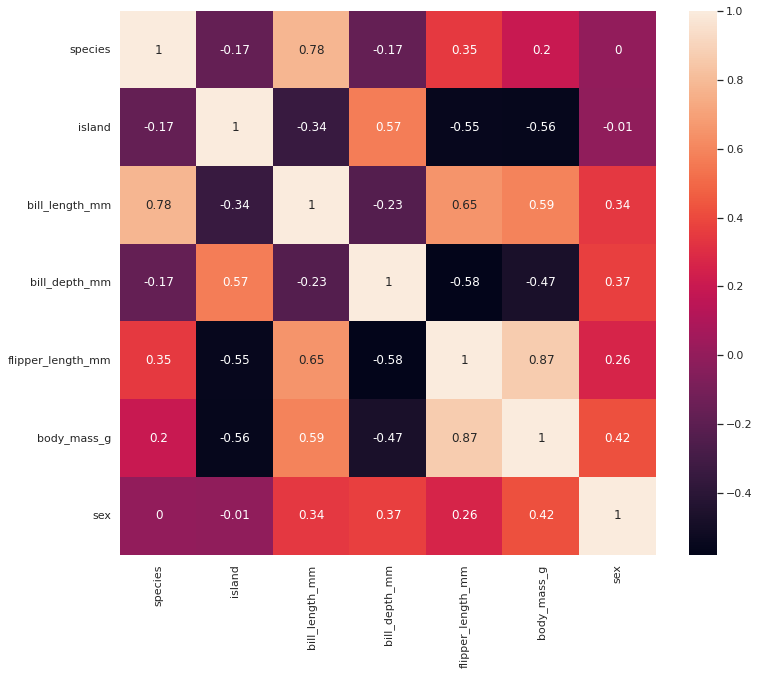

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = penguins_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [197]:
# island와 species 가 성별 판별에 상관관계가 없어보이므로 제거해서 다시 학습해보자
penguins_df2 = penguins_df.drop(['species','island'], axis='columns')

In [198]:
penguins_df2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,0


In [199]:
x2 = penguins_df2.iloc[:, :4]
y2 = penguins_df2.iloc[:, -1]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3) #학습용과 테스트용 분리
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [201]:
y_pred = knn.predict(X_test)

In [202]:
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.75
